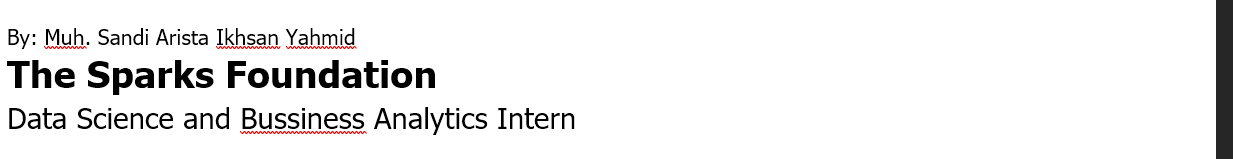
# Task 1: Prediction Using Supervised ML
Predict the  percentage of a student based on the no. of study hours <br>
This is a simple linear regression task as it involves just 2 variables

## Dataset
Dataset can be found at http://bit.ly/w-data. <br> 
In this notebook, dataset downloaded to local computer as 'Student.csv'

In [1]:
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import datasets from local file
data = pd.read_csv("Student.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

Text(0, 0.5, 'Scores')

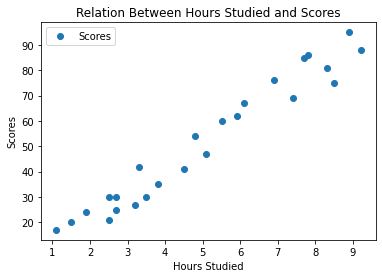

In [5]:
# Visualizing dataset
data.plot(x='Hours', y='Scores', style='o')
plt.title('Relation Between Hours Studied and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')

## Preparation
Data divided into attributes (input) as **x** and labels (output) as **y** <br>

In [6]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [7]:
x.shape

(25, 1)

In [8]:
# splitting data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training and Evaluation

In [9]:
# importing and fit the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(x_test)

In [11]:
# evaluating model accuracy using MAE
from sklearn.metrics import mean_absolute_error
test = pd.DataFrame({'Actual':y_test[:,0], 'Predicted':y_pred[:,0]})
test

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
print('MAE: ', mean_absolute_error(y_test, y_pred))

MAE:  4.183859899002975


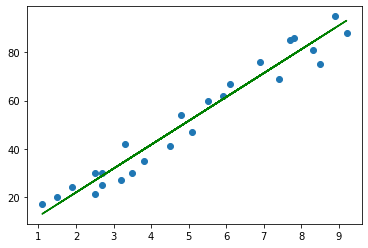

In [13]:
# Visualizing model prediction
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line, color='green')
plt.show()

## Solution
**The problem** given is what will be predicted score if a student studies for 9.25 hours/day?

In [14]:
hours = 9.25
x_prob = np.array(hours).reshape(-1,1)
y_prob = lr.predict(x_prob)
print('If a student studies for {} hours/day, he/she will predicted to get score {}'.format(x_prob, y_prob[0]))

If a student studies for [[9.25]] hours/day, he/she will predicted to get score [93.69173249]
